<a href="https://colab.research.google.com/github/efrat-dev/insider-threat-detector/blob/main/generate_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

def generate_security_dataset(rows=5000):
    # הגדרת מדינות וציוני סיכון שלהן (1-10)
    country_risk = {
        'Israel': 1,
        'USA': 2,
        'UK': 2,
        'France': 2,
        'Germany': 2,
        'Spain': 2,
        'Italy': 2,
        'Japan': 2,
        'Russia': 8,
        'Ukraine': 7,
        'Iran': 9,
        'Syria': 9,
        'Lebanon': 8,
        'China': 6,
        'North Korea': 10
    }

    regular_countries = [c for c, risk in country_risk.items() if risk <= 5]
    hostile_countries = [c for c, risk in country_risk.items() if risk > 5]

    data = []
    start_date = datetime(2023, 1, 1)
    employee_ids = range(1, 201)

    for _ in range(rows):
        is_suspicious = random.random() < 0.10

        if is_suspicious:
            suspicion_level = random.choices(['high', 'medium', 'low'], weights=[0.1, 0.4, 0.5])[0]

        emp_id = random.choice(employee_ids)
        date = start_date + timedelta(days=random.randint(0, 364))

        # בחירת מדינת מוצא
        if is_suspicious:
            country_weights = [country_risk[c] for c in hostile_countries]
            country = random.choices(hostile_countries, weights=country_weights)[0]
        else:
            country = random.choice(regular_countries)

        # קביעת אזרחות זרה - תלוי במדינת המוצא
        if country != 'Israel':
            foreign_citizenship = 'Yes' if random.random() < 0.9 else 'No'  # 90% סיכוי לאזרחות זרה למי שנולד בחו"ל
        else:
            foreign_citizenship = 'Yes' if random.random() < 0.15 else 'No'  # 15% סיכוי לאזרחות זרה לילידי ישראל

        # הגדרת מאפיינים לפי רמת החשד - עם טווח הדפסות מעודכן (0-10 דפים)
        if is_suspicious:
            if suspicion_level == 'high':
                print_count = round(random.uniform(7, 10), 1)
                odd_hours_count = round(random.uniform(2, 4), 1)
                presence_hours = round(random.uniform(10.5, 12), 1)
                foreign_travel = random.randint(1, 3)
                hostile_travel = random.randint(1, 2)
            elif suspicion_level == 'medium':
                print_count = round(random.uniform(5, 7), 1)
                odd_hours_count = round(random.uniform(1, 2), 1)
                presence_hours = round(random.uniform(9.5, 10.5), 1)
                foreign_travel = random.randint(1, 2)
                hostile_travel = random.randint(0, 1)
            else:  # low
                print_count = round(random.uniform(3, 5), 1)
                odd_hours_count = round(random.uniform(0.5, 1), 1)
                presence_hours = round(random.uniform(8.8, 9.5), 1)
                foreign_travel = random.randint(0, 1)
                hostile_travel = 0 if country in regular_countries else random.randint(0, 1)
        else:
            print_count = round(random.uniform(0, 3), 1)
            odd_hours_count = round(random.uniform(0, 0.5), 1)
            presence_hours = round(random.uniform(8.0, 9.0), 1)
            foreign_travel = random.randint(0, 1)
            hostile_travel = 0

        # חישוב נפח הדפסה (נניח שכל דף הוא 2MB בממוצע)
        print_volume = round(print_count * 2, 1)
        odd_hours_volume = round(odd_hours_count * 2, 1)

        # הגדרת שאר המאפיינים
        criminal_record = 'Yes' if (is_suspicious and random.random() < 0.2) else 'No'
        medical_issues = 'Yes' if random.random() < 0.15 else 'No'
        security_violations = 'Yes' if (is_suspicious and random.random() < 0.3) else 'No'
        disciplinary_actions = 'Yes' if (is_suspicious and random.random() < 0.25) else 'No'
        odd_hours_entry = 'Yes' if odd_hours_count > 0 else 'No'

        data.append({
            'Employee_ID': emp_id,
            'Date': date.strftime('%Y-%m-%d'),
            'Print_Count': print_count,
            'Print_Volume_MB': print_volume,
            'Odd_Hours_Print_Count': odd_hours_count,
            'Odd_Hours_Print_Volume_MB': odd_hours_volume,
            'Total_Presence_Hours': presence_hours,
            'Odd_Hours_Entry': odd_hours_entry,
            'Foreign_Travel_Count': foreign_travel,
            'Travel_To_Hostile_Countries_Count': hostile_travel,
            'Country_Of_Origin': country,
            'Country_Risk_Score': country_risk[country],
            'Foreign_Citizenship': foreign_citizenship,
            'Criminal_Record': criminal_record,
            'Medical_Issues': medical_issues,
            'Security_Violations': security_violations,
            'Disciplinary_Actions': disciplinary_actions,
            'Suspicious_Flag': 1 if is_suspicious else 0
        })

    df = pd.DataFrame(data)
    return df

# יצירת הדאטה סט
df = generate_security_dataset(5000)

# מיון לפי תאריך ומספר עובד
df = df.sort_values(['Date', 'Employee_ID'])

# שמירת הקובץ
df.to_csv('employee_security_analysis.csv', index=False)

# הצגת סטטיסטיקה בסיסית
print("Total Records:", len(df))
print("\nSuspicious Records:", len(df[df['Suspicious_Flag'] == 1]))
print("Normal Records:", len(df[df['Suspicious_Flag'] == 0]))
print("\nAverage prints per day:", df['Print_Count'].mean())
print("\nForeign citizenship by country of origin:")
print(df.groupby('Country_Of_Origin')['Foreign_Citizenship'].value_counts(normalize=True))

Total Records: 5000

Suspicious Records: 490
Normal Records: 4510

Average prints per day: 1.86136

Foreign citizenship by country of origin:
Country_Of_Origin  Foreign_Citizenship
China              Yes                    0.806452
                   No                     0.193548
France             Yes                    0.880539
                   No                     0.119461
Germany            Yes                    0.910072
                   No                     0.089928
Iran               Yes                    0.902174
                   No                     0.097826
Israel             No                     0.860424
                   Yes                    0.139576
Italy              Yes                    0.910280
                   No                     0.089720
Japan              Yes                    0.904930
                   No                     0.095070
Lebanon            Yes                    0.921875
                   No                     0.078125
Nor

=== Basic Statistics ===
Total Records: 5000
Suspicious Records: 490 (9.80%)
Normal Records: 4510 (90.20%)

Print Statistics:
                  count      mean       std  min  25%  50%  75%   max
Suspicious_Flag                                                      
0                4510.0  1.486785  0.869287  0.0  0.7  1.5  2.2   3.0
1                 490.0  5.308980  1.672929  3.0  4.0  4.9  6.2  10.0


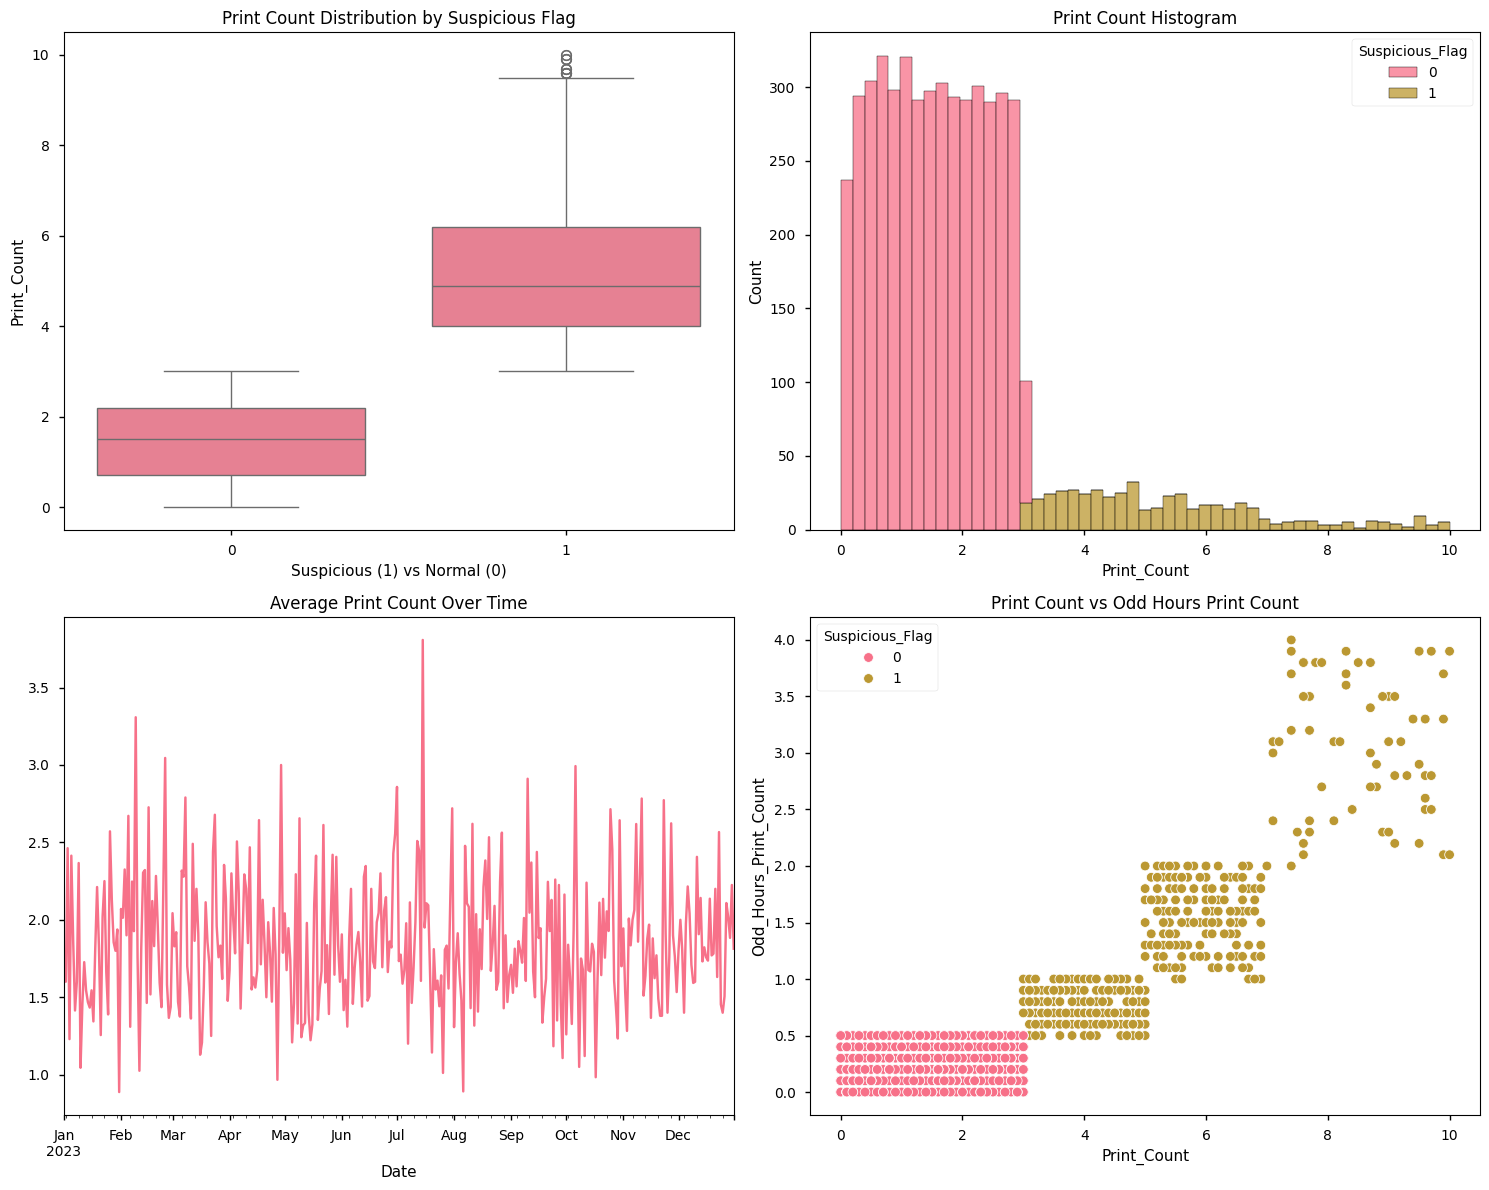

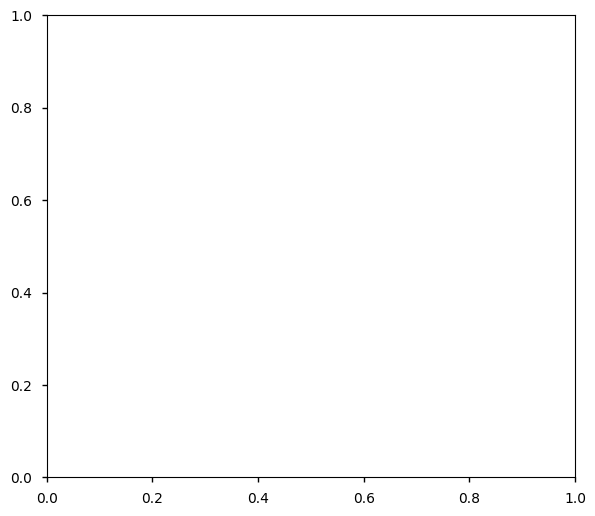

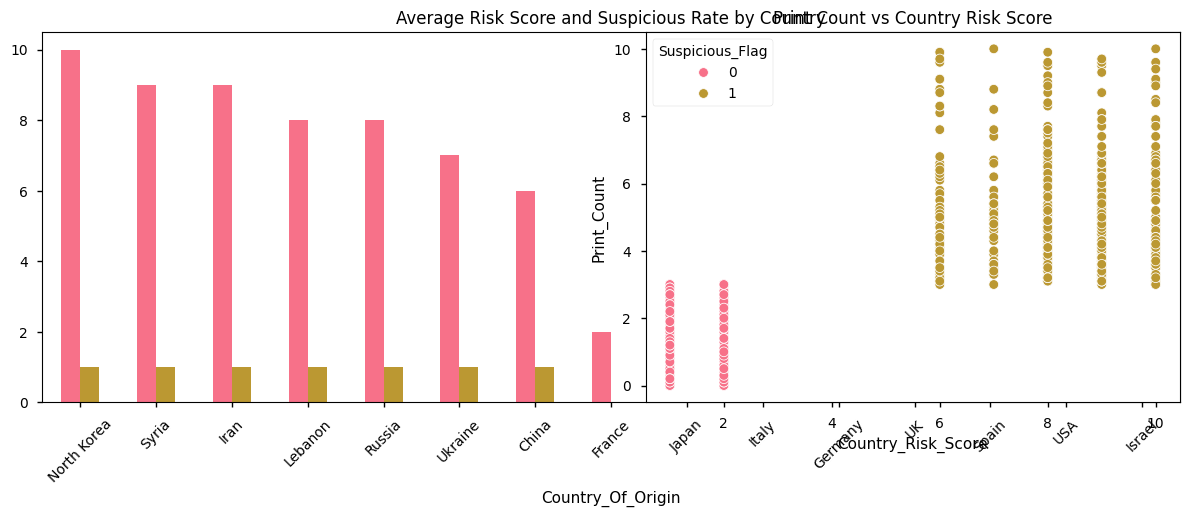

<Figure size 1200x600 with 0 Axes>

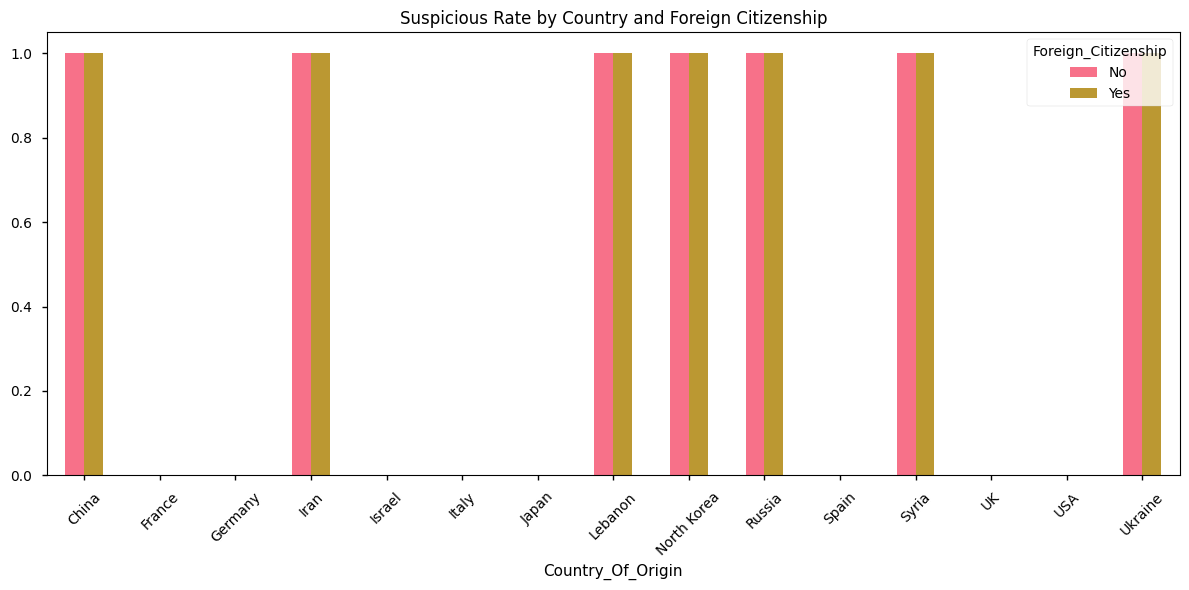

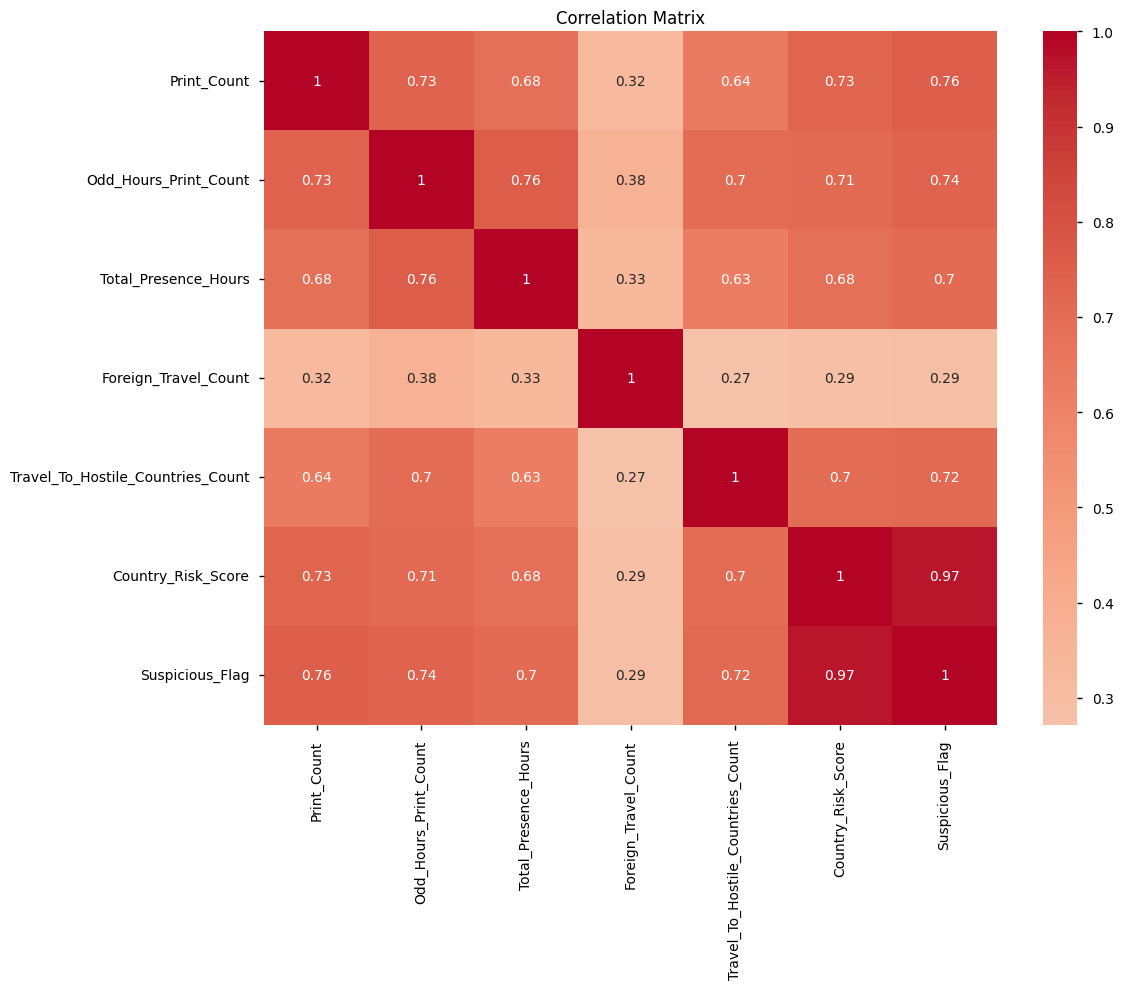

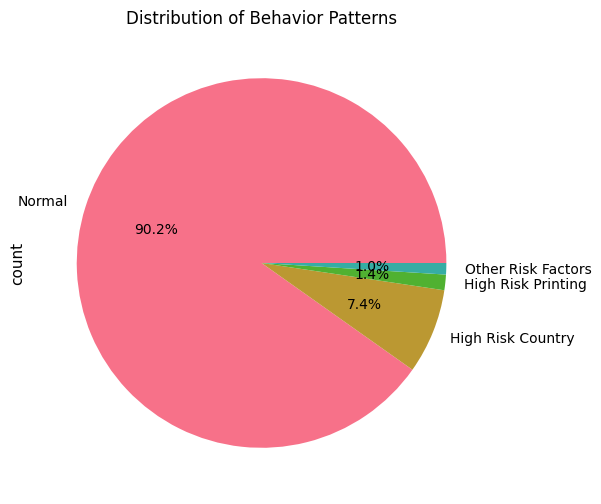


=== Detailed Statistics by Behavior Pattern ===
                   Print_Count       Odd_Hours_Print_Count  \
                          mean   std                  mean   
Behavior_Pattern                                             
High Risk Country         4.80  1.09                  1.08   
High Risk Printing        8.53  0.91                  3.06   
Normal                    1.49  0.87                  0.25   
Other Risk Factors        4.76  1.05                  1.05   

                   Total_Presence_Hours Country_Risk_Score  \
                                   mean               mean   
Behavior_Pattern                                             
High Risk Country                  9.48               8.67   
High Risk Printing                11.24               8.26   
Normal                             8.50               1.87   
Other Risk Factors                 9.51               6.00   

                   Foreign_Travel_Count  
                                   mean

<ipython-input-8-24ac98509e27>:128: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('Date').groupby([pd.Grouper(freq='M')])['Suspicious_Flag'].mean().plot()


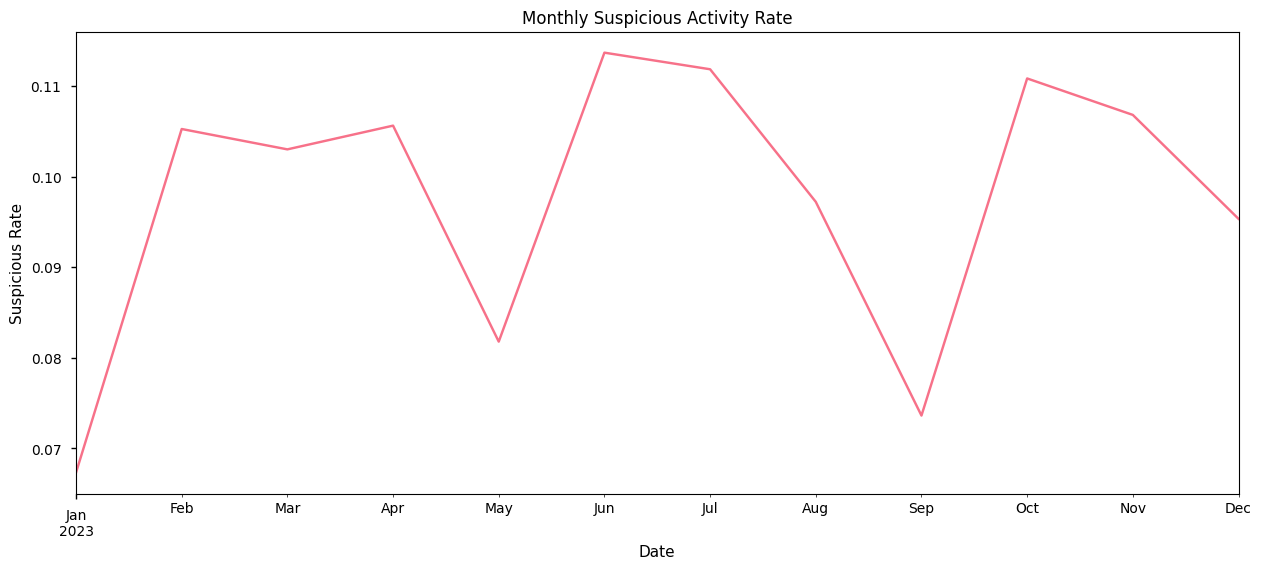

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# קריאת הקובץ
df = pd.read_csv('employee_security_analysis.csv')
df['Date'] = pd.to_datetime(df['Date'])

# הגדרת סגנון ויזואלי
plt.style.use('seaborn-v0_8-notebook')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 6]

# 1. סטטיסטיקה בסיסית
print("=== Basic Statistics ===")
print(f"Total Records: {len(df)}")
print(f"Suspicious Records: {len(df[df['Suspicious_Flag'] == 1])} ({(len(df[df['Suspicious_Flag'] == 1])/len(df)*100):.2f}%)")
print(f"Normal Records: {len(df[df['Suspicious_Flag'] == 0])} ({(len(df[df['Suspicious_Flag'] == 0])/len(df)*100):.2f}%)")
print("\nPrint Statistics:")
print(df.groupby('Suspicious_Flag')['Print_Count'].describe())

# 2. ניתוח הדפסות
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# התפלגות כמות הדפסות
sns.boxplot(x='Suspicious_Flag', y='Print_Count', data=df, ax=axes[0,0])
axes[0,0].set_title('Print Count Distribution by Suspicious Flag')
axes[0,0].set_xlabel('Suspicious (1) vs Normal (0)')

# היסטוגרמת הדפסות
sns.histplot(data=df, x='Print_Count', hue='Suspicious_Flag', multiple="stack", ax=axes[0,1])
axes[0,1].set_title('Print Count Histogram')

# הדפסות לאורך זמן
df.groupby('Date')['Print_Count'].mean().plot(ax=axes[1,0])
axes[1,0].set_title('Average Print Count Over Time')

# הדפסות בשעות חריגות
sns.scatterplot(data=df, x='Print_Count', y='Odd_Hours_Print_Count',
                hue='Suspicious_Flag', ax=axes[1,1])
axes[1,1].set_title('Print Count vs Odd Hours Print Count')
plt.tight_layout()
plt.show()

# 3. ניתוח מדינות וסיכון
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
country_risk = df.groupby('Country_Of_Origin')[['Country_Risk_Score', 'Suspicious_Flag']].mean()
country_risk.sort_values('Country_Risk_Score', ascending=False).plot(kind='bar')
plt.title('Average Risk Score and Suspicious Rate by Country')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Country_Risk_Score', y='Print_Count', hue='Suspicious_Flag')
plt.title('Print Count vs Country Risk Score')
plt.tight_layout()
plt.show()

# 4. ניתוח אזרחות זרה
plt.figure(figsize=(12, 6))
citizenship_analysis = df.groupby(['Country_Of_Origin', 'Foreign_Citizenship'])['Suspicious_Flag'].mean().unstack()
citizenship_analysis.plot(kind='bar')
plt.title('Suspicious Rate by Country and Foreign Citizenship')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. מטריצת קורלציה מעודכנת
plt.figure(figsize=(12, 10))
numeric_cols = ['Print_Count', 'Odd_Hours_Print_Count', 'Total_Presence_Hours',
                'Foreign_Travel_Count', 'Travel_To_Hostile_Countries_Count',
                'Country_Risk_Score', 'Suspicious_Flag']
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# 6. ניתוח דפוסי התנהגות
def determine_behavior_pattern(row):
    if row['Suspicious_Flag'] == 0:
        return 'Normal'
    elif row['Print_Count'] >= 7:
        return 'High Risk Printing'
    elif row['Country_Risk_Score'] >= 7:
        return 'High Risk Country'
    elif row['Odd_Hours_Print_Count'] > 2:
        return 'Suspicious Hours'
    else:
        return 'Other Risk Factors'

df['Behavior_Pattern'] = df.apply(determine_behavior_pattern, axis=1)

plt.figure(figsize=(10, 6))
behavior_dist = df['Behavior_Pattern'].value_counts()
behavior_dist.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Behavior Patterns')
plt.show()

# 7. סטטיסטיקה מפורטת
print("\n=== Detailed Statistics by Behavior Pattern ===")
behavior_stats = df.groupby('Behavior_Pattern').agg({
    'Print_Count': ['mean', 'std'],
    'Odd_Hours_Print_Count': 'mean',
    'Total_Presence_Hours': 'mean',
    'Country_Risk_Score': 'mean',
    'Foreign_Travel_Count': 'mean'
}).round(2)
print(behavior_stats)

# 8. ניתוח חריגים
print("\n=== Anomaly Analysis ===")
print("\nHigh Risk Country but Normal Behavior:")
high_risk_normal = df[(df['Country_Risk_Score'] >= 7) &
                     (df['Print_Count'] < df['Print_Count'].mean()) &
                     (df['Suspicious_Flag'] == 0)].shape[0]
print(f"Count: {high_risk_normal}")

print("\nLow Risk Country but Suspicious Behavior:")
low_risk_suspicious = df[(df['Country_Risk_Score'] < 5) &
                        (df['Print_Count'] > df['Print_Count'].quantile(0.95)) &
                        (df['Suspicious_Flag'] == 1)].shape[0]
print(f"Count: {low_risk_suspicious}")

# 9. ניתוח זמן ומגמות
plt.figure(figsize=(15, 6))
df.set_index('Date').groupby([pd.Grouper(freq='M')])['Suspicious_Flag'].mean().plot()
plt.title('Monthly Suspicious Activity Rate')
plt.xlabel('Date')
plt.ylabel('Suspicious Rate')
plt.show()